## Google Parser 

In [1]:
import os

os.environ['PATH'] += ':/Users/abderrazzak/google-cloud-sdk/bin'

In [2]:

from google.api_core.client_options import ClientOptions
from google.cloud import documentai  # type: ignore

# TODO(developer): Uncomment these variables before running the sample.
project_id = 'orangebot-7551'
location = 'us' # Format is 'us' or 'eu'


def fetch_processor_types_sample(project_id: str, location: str) -> None:
    # You must set the api_endpoint if you use a location other than 'us'.
    opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

    client = documentai.DocumentProcessorServiceClient(client_options=opts)

    # The full resource name of the location
    # e.g.: projects/project_id/locations/location
    parent = client.common_location_path(project_id, location)

    # Fetch all processor types
    response = client.fetch_processor_types(parent=parent)

    print("Processor types:")
    # Print the available processor types
    for processor_type in response.processor_types:
        if processor_type.allow_creation:
            print(processor_type.type_)


/Users/abderrazzak/Desktop/rag_gcp/raggcp/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
fetch_processor_types_sample(project_id=project_id, location=location)

I0000 00:00:1721380123.826491    7148 config.cc:230] gRPC experiments enabled: call_status_override_on_cancellation, event_engine_dns, event_engine_listener, http2_stats_fix, monitoring_experiment, pick_first_new, trace_record_callops, work_serializer_clears_time_cache, work_serializer_dispatch
I0000 00:00:1721380123.837424    7148 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


Processor types:
INVOICE_PROCESSOR
CUSTOM_EXTRACTION_PROCESSOR
FORM_PARSER_PROCESSOR
OCR_PROCESSOR
FORM_W9_PROCESSOR
CUSTOM_CLASSIFICATION_PROCESSOR
UTILITY_PROCESSOR
EXPENSE_PROCESSOR
CUSTOM_SPLITTING_PROCESSOR
US_DRIVER_LICENSE_PROCESSOR
US_PASSPORT_PROCESSOR
ID_PROOFING_PROCESSOR
SUMMARY_PROCESSOR
LAYOUT_PARSER_PROCESSOR


I0000 00:00:1721380125.123061   50183 tcp_posix.cc:809] IOMGR endpoint shutdown
I0000 00:00:1721380125.124367   50183 work_stealing_thread_pool.cc:269] WorkStealingThreadPoolImpl::Quiesce


In [8]:

from google.api_core.client_options import ClientOptions
from google.cloud import documentai  # type: ignore

# TODO(developer): Uncomment these variables before running the sample.
processor_display_name = 'layout processor' # Must be unique per project, e.g.: 'My Processor'
processor_type = 'LAYOUT_PARSER_PROCESSOR'
# Use fetch_processor_types to get available processor types


def create_processor_sample(
    project_id: str, location: str, processor_display_name: str, processor_type: str
) -> None:
    # You must set the api_endpoint if you use a location other than 'us'.
    opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

    client = documentai.DocumentProcessorServiceClient(client_options=opts)

    # The full resource name of the location
    # e.g.: projects/project_id/locations/location
    parent = client.common_location_path(project_id, location)

    # Create a processor
    processor = client.create_processor(
        parent=parent,
        processor=documentai.Processor(
            display_name=processor_display_name, type_=processor_type
        ),
    )

    # Print the processor information
    print(f"Processor Name: {processor.name}")
    print(f"Processor Display Name: {processor.display_name}")
    print(f"Processor Type: {processor.type_}")


In [9]:
create_processor_sample(project_id=project_id, location=location, processor_display_name=processor_display_name, processor_type=processor_type)

I0000 00:00:1721382045.367884    7148 check_gcp_environment_no_op.cc:29] ALTS: Platforms other than Linux and Windows are not supported


Processor Name: projects/662868193247/locations/us/processors/4cc8275190ef203e
Processor Display Name: layout processor
Processor Type: LAYOUT_PARSER_PROCESSOR


I0000 00:00:1721382047.890868   74439 tcp_posix.cc:809] IOMGR endpoint shutdown
I0000 00:00:1721382047.893698   74439 work_stealing_thread_pool.cc:269] WorkStealingThreadPoolImpl::Quiesce


In [ ]:
from typing import Optional

from google.api_core.client_options import ClientOptions
from google.cloud import documentai  # type: ignore

# TODO(developer): Uncomment these variables before running the sample.
# project_id = "YOUR_PROJECT_ID"
# location = "YOUR_PROCESSOR_LOCATION" # Format is "us" or "eu"
# processor_id = "YOUR_PROCESSOR_ID" # Create processor before running sample
# file_path = "/path/to/local/pdf"
# mime_type = "application/pdf" # Refer to https://cloud.google.com/document-ai/docs/file-types for supported file types
# field_mask = "text,entities,pages.pageNumber"  # Optional. The fields to return in the Document object.
# processor_version_id = "YOUR_PROCESSOR_VERSION_ID" # Optional. Processor version to use


def process_document_sample(
    project_id: str,
    location: str,
    processor_id: str,
    file_path: str,
    mime_type: str,
    field_mask: Optional[str] = None,
    processor_version_id: Optional[str] = None,
) -> None:
    # You must set the `api_endpoint` if you use a location other than "us".
    opts = ClientOptions(api_endpoint=f"{location}-documentai.googleapis.com")

    client = documentai.DocumentProcessorServiceClient(client_options=opts)

    if processor_version_id:
        # The full resource name of the processor version, e.g.:
        # `projects/{project_id}/locations/{location}/processors/{processor_id}/processorVersions/{processor_version_id}`
        name = client.processor_version_path(
            project_id, location, processor_id, processor_version_id
        )
    else:
        # The full resource name of the processor, e.g.:
        # `projects/{project_id}/locations/{location}/processors/{processor_id}`
        name = client.processor_path(project_id, location, processor_id)

    # Read the file into memory
    with open(file_path, "rb") as image:
        image_content = image.read()

    # Load binary data
    raw_document = documentai.RawDocument(content=image_content, mime_type=mime_type)

    # For more information: https://cloud.google.com/document-ai/docs/reference/rest/v1/ProcessOptions
    # Optional: Additional configurations for processing.
    process_options = documentai.ProcessOptions(
        # Process only specific pages
        individual_page_selector=documentai.ProcessOptions.IndividualPageSelector(
            pages=[1]
        )
    )

    # Configure the process request
    request = documentai.ProcessRequest(
        name=name,
        raw_document=raw_document,
        field_mask=field_mask,
        process_options=process_options,
    )

    result = client.process_document(request=request)

    # For a full list of `Document` object attributes, reference this page:
    # https://cloud.google.com/document-ai/docs/reference/rest/v1/Document
    document = result.document

    # Read the text recognition output from the processor
    print("The document contains the following text:")
    print(document.text)


In [8]:
text = "Convention Orange - FAR\nDocument Ventes/CRC\norange\nTM\nLa convention FAR\n2 Interne Orange\nLa convention établie avec les Forces Armées\nRoyales permettra de faire bénéficier les\nAdhérents, et les Pupilles de la nation (anciens\ncombattants) ainsi que leurs ayant droit (conjoints et\nenfants) d\u0027offres Mobile et Fixe préférentielles.\norange\nTM\nL\u0027offre mobile\nAvantages Adhérents \u0026 Pupilles de la nation*\nAdhérents \u0026 ayant droits\n-25% sur les FMS\n-25% sur les frais d\u0027abonnement\n1er mois offert\nPupilles de la nation \u0026 ayant droits\n-50% sur les FMS\n-50% sur les frais d\u0027abonnement\n1er mois offert\n*Applicable aux forfaits 99Dhs et plus.\n3\nInterne Orange\nPlans Mobile éligibles \u0026 tarifs remisés - Adhérents \u0026 ayant droits\nPrix public\nFMS \u0026 Abonnement\nTaux de remise\nPrix remisé\nFMS \u0026 Abonnement\nFrais d\u0027abonnement\n1er mois\nForfait Yo 11h + 11Go +\nIllimité Orange\nForfait Yo RS 20Go + 1h\n+ RS illimités\nForfait Yo 17h + 17Go\nForfait Yo RS 30Go + 3h\n+ RS illimités\nForfait Yo 25Go +\nAppels \u0026 SMS illimités\nForfait Yo RS 40Go + 5h\n+ RS illimités\n99phe\n149.\nDhs\nDhs\n-25% 74,25phs\n-25% 111,75pha\n199 -25% 149.25\nDhs\n4\nInterne Orange\n0\nDhs\n0\nDhs\n0.\nDhs\nPlans Mobile éligibles \u0026 tarifs remisés - Pupilles de la nation \u0026 ayant droits\nPrix public\nFMS \u0026 Abonnement\nTaux de remise\nPrix remisé\nFMS \u0026 Abonnement\nFrais d\u0027abonnement\n1er mois\nForfait Yo 11h + 11Go +\nIllimité Orange\nForfait Yo RS 20Go + 1h\n+ RS illimités\nForfait Yo 17h + 17Go\nForfait Yo RS 30Go + 3h\n+ RS illimités\nForfait Yo 25Go +\nAppels \u0026 SMS illimités\nForfait Yo RS 40Go + 5h\n+ RS illimités\n99 -50% 49,5\nDhs\n49,5phs\n0\nDhs\n149 -50% 74.5 0.\nDhs\n,5Dhs\n199 -50% 99.5\nDhs\nDhs\n0...\nDhs\n5\nInterne Orange\nL\u0027offre fixe : Fibre et Dar Box 4G+\nAvantages Adhérents \u0026 Pupilles de la nation*\nAdhérents \u0026 ayant droits\n-25% sur les frais d\u0027abonnement\nPupilles de la nation \u0026 ayant droits\n-50% sur les frais d\u0027abonnement\nFMS à 0 Dh\n*Applicable aux offres:\nFibre: 50, 100 et 200 Méga\nDar Box 4G+: 199 et 249 Dh\n6\nInterne Orange\nFMS à 0 Dh\nPlans Fixe éligibles \u0026 tarifs remisés – Adhérents \u0026 ayant droits\n-\nFrais d\u0027abonnement\nPublic\nTaux de remise\nFibre 50 Méga\n349.ht\n-25%\nDhs\nFibre 100 Méga\n449phe\n-25%\nDhs\nFibre 200 Méga\n649phe\n-25%\n486,75D\nFrais d\u0027abonnement\nRemisés\n261,75\nDhs\n336,75 Dhs\nFMS\nOpha\n0.\n0.\n0\nDhs\nDhs\nOpha\nDhs\nDhs\nDhs\nDar Box 4G+ 199\n199phe\n-25%\n149phs\nDhs\nDhs\nDar Box 4G+ 249\n249.png\n-25%\n187Dhs\nOphs\nDhs\n7\nInterne Orange\nPlans Fixe éligibles \u0026 tarifs remisés - Pupilles de la nation \u0026 ayant droits\nFMS\nFrais d\u0027abonnement\nPublic\nTaux de remise\nFrais d\u0027abonnement\nRemisés\nFibre 50 Méga\n349.okt\n-50%\n174,5 Dhs\n0.\nOpha\nDhs\nDhs\nFibre 100 Méga\n449phe\n-50%\n224,5 Dhs\n0.\nDhs\nDhs\nFibre 200 Méga\n649ppe\n-50%\n324,5 Dhs\n0\nOpha\nDhs\nDhs\nDar Box 4G+ 199\n199phe\n-50%\n99 phs\nDhs\nDhs\nDar Box 4G+ 249\n249.png\n-50%\n124,5 Dhs\nOphs\nDhs\n8\nInterne Orange\nConditions d\u0027éligibilité\norange\nOrgane\nDGSS/FAR\nDIRECTION GÉNÉRALE DES\nSERVICES SOCIAUX/\nFORCES ARMÉES ROYALES\nBénéficiaires\nAdhérents\nConjoint (e)\nTaux de\nla remise\n-25%\n-25%\nEnfants(tout âge)\n-25%\nAdhérents\n-25%\nConjoint (e). veuve\nveuf\n-25%\nDFH II OSAMAC\nDIRECTION DE LA FONDATION\nHASSAN II POUR LES ŒUVRES\nSOCIALES DES ANCIENS\nMILITAIRES ET ANCIENS\nCOMBATTANTS\nEnfants(tout âge)\n-25%\nPupilles de la nation\n- Catégorie Particulière :\n-Veuves et ascendants de martyrs ;\n-Blessés ;\n-50%\n-Rapatriés et ralliés.\nPersonnel civil ADN en\nAdhérents\n-25%\nactivité\nConjoint (e)\n-25%\nADMINISTRATION DE LA DÉFENSE\nNATIONALE\nEnfants(tout âge)\n-25%\nAdhérent\n-25%\nPersonnel civil ADN en\nretraite\nADMINISTRATION DE LA DÉFENSE\nNATIONALE\nConjoint (e) / Veuve\n-25%\nEnfants(tout âge)\n-25%\nDocuments à fournir\nCarte militaire ou carte mutuelle des FAR\nAttestation dûment signée par la délégation des\nservices sociaux où Carte mutuelle des FAR\nCarte Fondation Hassan II/OSAMAC\nCarte Fondation Hassan II/ OSAMAC ou Carte\nmutuelle des FAR\nCarte de l\u0027Adhérent + copie de l\u0027Etat civil du\nbénéficiaire\nCarte Fondation Hassan II/OSAMAC ou carte Enfants\nVictimes du séisme d\u0027Al Hoceima (EVS).\nCarte mutuelle ou Attestation dûment signée par le\ndélégué des services sociaux des FAR\nCarte Fondation Hassan II/OSAMAC\nCarte Fondation Hassan II/OSAMAC ou Carte\nmutuelle des FAR\nCarte de l\u0027adhérent + copie de l\u0027Etat civil du\nbénéficiaire\n"

In [9]:
print(text)

Convention Orange - FAR
Document Ventes/CRC
orange
TM
La convention FAR
2 Interne Orange
La convention établie avec les Forces Armées
Royales permettra de faire bénéficier les
Adhérents, et les Pupilles de la nation (anciens
combattants) ainsi que leurs ayant droit (conjoints et
enfants) d'offres Mobile et Fixe préférentielles.
orange
TM
L'offre mobile
Avantages Adhérents & Pupilles de la nation*
Adhérents & ayant droits
-25% sur les FMS
-25% sur les frais d'abonnement
1er mois offert
Pupilles de la nation & ayant droits
-50% sur les FMS
-50% sur les frais d'abonnement
1er mois offert
*Applicable aux forfaits 99Dhs et plus.
3
Interne Orange
Plans Mobile éligibles & tarifs remisés - Adhérents & ayant droits
Prix public
FMS & Abonnement
Taux de remise
Prix remisé
FMS & Abonnement
Frais d'abonnement
1er mois
Forfait Yo 11h + 11Go +
Illimité Orange
Forfait Yo RS 20Go + 1h
+ RS illimités
Forfait Yo 17h + 17Go
Forfait Yo RS 30Go + 3h
+ RS illimités
Forfait Yo 25Go +
Appels & SMS illimités
Fo

In [21]:
IMAGE_PATH = "/Users/abderrazzak/Desktop/Screenshot 2024-07-16 at 19.27.49.png"

In [22]:
from PIL import Image
from surya.detection import batch_text_detection
from surya.layout import batch_layout_detection
from surya.model.detection.model import load_model, load_processor
from surya.settings import settings

image = Image.open(IMAGE_PATH)
model = load_model(checkpoint=settings.LAYOUT_MODEL_CHECKPOINT)
processor = load_processor(checkpoint=settings.LAYOUT_MODEL_CHECKPOINT)
det_model = load_model()
det_processor = load_processor()

# layout_predictions is a list of dicts, one per image
line_predictions = batch_text_detection([image], det_model, det_processor)
layout_predictions = batch_layout_detection([image], model, processor, line_predictions)

I0000 00:00:1721154977.744704  136070 work_stealing_thread_pool.cc:321] WorkStealingThreadPoolImpl::PrepareFork


Loaded detection model vikp/surya_layout3 on device mps with dtype torch.float16
Loaded detection model vikp/surya_det3 on device mps with dtype torch.float16


Detecting bboxes: 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]


In [23]:
layout_predictions

[LayoutResult(bboxes=[LayoutBox(polygon=[[139, 1199], [342, 1199], [342, 1226], [139, 1226]], confidence=1.0, label='Page-footer', bbox=[139, 1199, 342, 1226]), LayoutBox(polygon=[[2012, 386], [2210, 386], [2210, 513], [2012, 513]], confidence=1.0, label='Figure', bbox=[2012, 386, 2210, 513]), LayoutBox(polygon=[[730, 389], [920, 389], [920, 481], [730, 481]], confidence=1.0, label='Figure', bbox=[730, 389, 920, 481]), LayoutBox(polygon=[[1607, 383], [1789, 429], [1717, 512], [1534, 466]], confidence=1.0, label='Figure', bbox=[1607, 383, 1789, 512]), LayoutBox(polygon=[[2012, 666], [2212, 666], [2212, 795], [2012, 795]], confidence=1.0, label='Figure', bbox=[2012, 666, 2212, 795]), LayoutBox(polygon=[[710, 693], [868, 693], [868, 769], [710, 769]], confidence=1.0, label='Figure', bbox=[710, 693, 868, 769]), LayoutBox(polygon=[[2012, 963], [2206, 963], [2206, 1092], [2012, 1092]], confidence=1.0, label='Figure', bbox=[2012, 963, 2206, 1092]), LayoutBox(polygon=[[645, 971], [874, 967], [

In [24]:
line_predictions

[TextDetectionResult(bboxes=[PolygonBox(polygon=[[29, 23], [918, 23], [918, 79], [29, 79]], confidence=1.0, bbox=[29, 23, 918, 79]), PolygonBox(polygon=[[316, 138], [399, 138], [399, 166], [316, 166]], confidence=0.9640798568725586, bbox=[316, 138, 399, 166]), PolygonBox(polygon=[[488, 138], [603, 138], [603, 166], [488, 166]], confidence=0.9597901701927185, bbox=[488, 138, 603, 166]), PolygonBox(polygon=[[689, 138], [777, 138], [777, 166], [689, 166]], confidence=0.962316632270813, bbox=[689, 138, 777, 166]), PolygonBox(polygon=[[836, 138], [989, 138], [989, 167], [836, 167]], confidence=0.9621343016624451, bbox=[836, 138, 989, 167]), PolygonBox(polygon=[[282, 172], [434, 172], [434, 202], [282, 202]], confidence=0.9572359323501587, bbox=[282, 172, 434, 202]), PolygonBox(polygon=[[657, 172], [810, 172], [810, 202], [657, 202]], confidence=0.9505596160888672, bbox=[657, 172, 810, 202]), PolygonBox(polygon=[[879, 173], [945, 173], [945, 202], [879, 202]], confidence=0.9447354674339294, 

In [2]:
!pip install unstructured
!pip install pdfminer.six


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [5]:
from unstructured.partition.pdf import partition_pdf

filename = "/Users/abderrazzak/Desktop/test.pdf"

# infer_table_structure=True automatically selects hi_res strategy
elements = partition_pdf(filename=filename, infer_table_structure=True)
tables = [el for el in elements if el.category == "Table"]

print(tables.text)
print('--------------------------------------------------')
print(tables.metadata.text_as_html)

AttributeError: 'list' object has no attribute 'text'

In [6]:
tables

[]

In [2]:
tables[0].metadata.text_as_html

'<table><thead><tr><th rowspan="2">Fibre 50 Méga</th><th rowspan="2">ublic 349...</th><th colspan="2">Remisés</th><th rowspan="2">CO</th></tr><tr><th>261</th><th>375».</th></tr></thead><tbody><tr><td>Fibre 100 Mega</td><td>449...</td><td></td><td>336,75 on</td><td>i] = a</td></tr><tr><td>Fibre 200 Mega</td><td>649...</td><td></td><td>486.75 «.</td><td>o00</td></tr><tr><td>Dar Box 4G+ 199</td><td>199...</td><td></td><td>149...</td><td></td></tr><tr><td>Dar Box 4G+ 249</td><td>249...</td><td></td><td>187...</td><td>So</td></tr></tbody></table>'

# OPEN PARSE

In [13]:
import openparse

from IPython.core.display import display, HTML
import pandas as pd

import time

/var/folders/qm/hylgtxrn4_52rhq5y412c56c0000gn/T/ipykernel_1532/4038306593.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [53]:
doc_path = "senegal_test/bf_splitted.pdf"

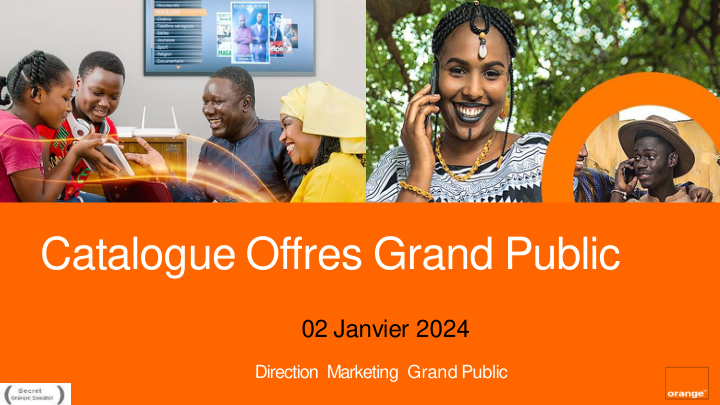

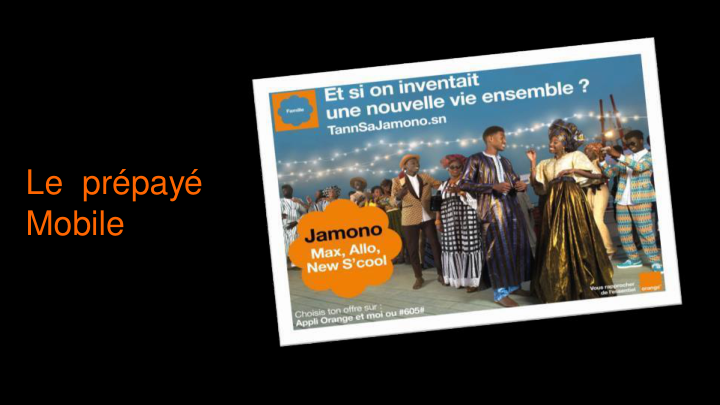

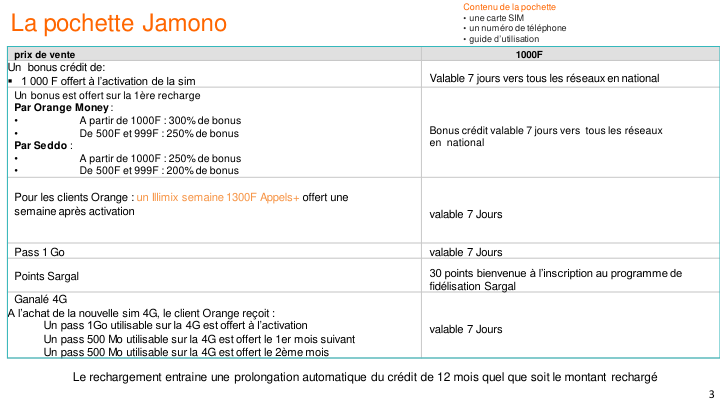

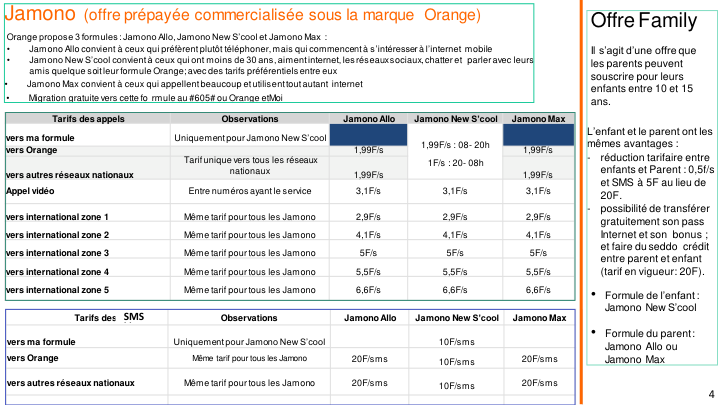

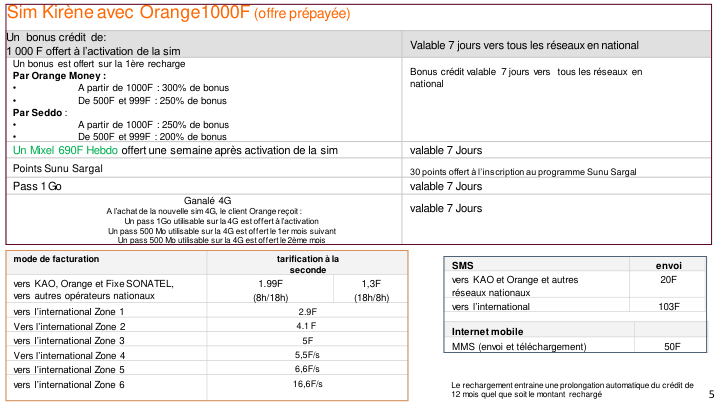

In [90]:
parser = openparse.DocumentParser(table_args={"parsing_algorithm": "pymupdf"})
parsed_doc = parser.parse(doc_path)

doc = openparse.Pdf(file=doc_path)
doc.display_with_bboxes(parsed_doc.nodes)

In [78]:
len(parsed_doc.nodes)

8

In [80]:
parsed_doc.nodes[5].end_page

4

In [33]:
print(parsed_doc.nodes[0].text)

<table border="1">
<tr><th>prix de vente</th><th>1000F</th></tr>
<tr><td>prix de vente</td><td>1000F</td></tr>
<tr><td>Un bonus crédit de:
▪ 1 000 F offert à l’activation de la sim</td><td>Valable 7 jours vers tous les réseaux en national</td></tr>
<tr><td>Un bonus est offert sur la 1ère recharge
Par Orange Money :
• A partir de 1000F : 300% de bonus
• De 500F et 999F : 250% de bonus
Par Seddo :
• A partir de 1000F : 250% de bonus
• De 500F et 999F : 200% de bonus</td><td>Bonus crédit valable 7 jours vers tous les réseaux
en national</td></tr>
<tr><td>Pour les clients Orange : un Illimix semaine 1300F Appels+ offert une
semaine après activation</td><td>valable 7 Jours</td></tr>
<tr><td>Pass 1 Go</td><td>valable 7 Jours</td></tr>
<tr><td>Points Sargal</td><td>30 points bienvenue à l’inscription au programme de
fidélisation Sargal</td></tr>
<tr><td>Ganalé 4G
A l’achat de la nouvelle sim 4G, le client Orange reçoit :
Un pass 1Go utilisable sur la 4G est offert à l’activation
Un pass 500 M

In [83]:
for i in range(len(parsed_doc.nodes)):
    print(parsed_doc.nodes[i].end_page)

2
3
3
3
3
4
4
4


In [2]:
from langchain_community.document_loaders import PyMuPDFLoader

/Users/abderrazzak/Desktop/rag_gcp/raggcp/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [64]:
loader = PyMuPDFLoader(doc_path)
data = loader.load()

In [91]:
data[2].metadata

{'source': 'senegal_test/bf_splitted.pdf',
 'file_path': 'senegal_test/bf_splitted.pdf',
 'page': 2,
 'total_pages': 5,
 'format': 'PDF 1.7',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': '',
 'producer': 'iLovePDF',
 'creationDate': '',
 'modDate': 'D:20240723152954Z',
 'trapped': ''}

In [71]:
split_data = data[4].page_content.split('\n')
first_sentence = split_data[0]
print(first_sentence)

Sim Kirène avec Orange1000F (offre prépayée)


In [74]:
jj = parsed_doc.nodes[0].text

In [76]:
print(first_sentence + " " + jj)

Sim Kirène avec Orange1000F (offre prépayée) <table border="1">
<tr><th>prix de vente</th><th>1000F</th></tr>
<tr><td>prix de vente</td><td>1000F</td></tr>
<tr><td>Un bonus crédit de:
▪ 1 000 F offert à l’activation de la sim</td><td>Valable 7 jours vers tous les réseaux en national</td></tr>
<tr><td>Un bonus est offert sur la 1ère recharge
Par Orange Money :
• A partir de 1000F : 300% de bonus
• De 500F et 999F : 250% de bonus
Par Seddo :
• A partir de 1000F : 250% de bonus
• De 500F et 999F : 200% de bonus</td><td>Bonus crédit valable 7 jours vers tous les réseaux
en national</td></tr>
<tr><td>Pour les clients Orange : un Illimix semaine 1300F Appels+ offert une
semaine après activation</td><td>valable 7 Jours</td></tr>
<tr><td>Pass 1 Go</td><td>valable 7 Jours</td></tr>
<tr><td>Points Sargal</td><td>30 points bienvenue à l’inscription au programme de
fidélisation Sargal</td></tr>
<tr><td>Ganalé 4G
A l’achat de la nouvelle sim 4G, le client Orange reçoit :
Un pass 1Go utilisable sur 

In [100]:
from langchain.docstore.document import Document


chunks = []
for i in range(len(parsed_doc.nodes)):
    page_number = parsed_doc.nodes[i].end_page
    title = data[page_number].page_content.split('\n')[0]
    chunks.append(
        Document(page_content= "le titre est: " + title + " le contenu est: " + parsed_doc.nodes[i].text,
        metadata= data[page_number].metadata)
        )

In [101]:
chunks

[Document(metadata={'source': 'senegal_test/bf_splitted.pdf', 'file_path': 'senegal_test/bf_splitted.pdf', 'page': 2, 'total_pages': 5, 'format': 'PDF 1.7', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'creator': '', 'producer': 'iLovePDF', 'creationDate': '', 'modDate': 'D:20240723152954Z', 'trapped': ''}, page_content='le titre est: La pochette Jamono le contenu est: <table border="1">\n<tr><th>prix de vente</th><th>1000F</th></tr>\n<tr><td>prix de vente</td><td>1000F</td></tr>\n<tr><td>Un bonus crédit de:\n▪ 1 000 F offert à l’activation de la sim</td><td>Valable 7 jours vers tous les réseaux en national</td></tr>\n<tr><td>Un bonus est offert sur la 1ère recharge\nPar Orange Money :\n• A partir de 1000F : 300% de bonus\n• De 500F et 999F : 250% de bonus\nPar Seddo :\n• A partir de 1000F : 250% de bonus\n• De 500F et 999F : 200% de bonus</td><td>Bonus crédit valable 7 jours vers tous les réseaux\nen national</td></tr>\n<tr><td>Pour les clients Orange : un Illimix semaine